# Cross Validation

Cross-validation is a method that goes beyond evaluating a single model using a single Train/Test split of the data by using **multiple Train/Test splits**, each of which is used to train and evaluate a separate model.

> cross-validation is used to evaluate the model and not learn or tune a new model. 

#### Why is CV better?
Cross-validation basically gives **more stable and reliable estimates** of how the classifiers likely to perform on average by running multiple different training test splits and then averaging the results, instead of relying entirely on a single particular training set. 

## 1. K-Fold CV
The most common type of cross-validation is k-fold cross-validation most commonly with K set to 5 or 10. The original dataset is partitioned into five parts of equal or close to equal size. Each of these parts is called a **fold**. Then a series of five models is trained one per fold. When this process is done, we have five accuracy values, one per fold.
![kfoldcv](http://vinhkhuc.github.io/assets/2015-03-01-cross-validation/5-fold-cv.png)

One benefit of computing the accuracy of a model on multiple splits instead of a single split, is that it gives us potentially useful information about how **sensitive the model** is to the nature of the specific training set. 

### 1. Import Libraries

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 2. Datasets

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## K-fold CV
##### Example based on k-NN classifier with fruit dataset (2 features)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y) 

print ('Default 3 fold Cross validation \n------------------------------')
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Default 3 fold Cross validation 
------------------------------
Cross-validation scores (3-fold): [ 0.77272727  0.73684211  0.83333333]
Mean cross-validation score (3-fold): 0.781


## 2. Stratified K-fold Cross-validation
The Stratified Cross-validation means that when splitting the data, the **proportions of classes** in each fold are made as close as possible to the **actual proportions** of the classes in the overall data set. For regression, scikit-learn uses regular k-fold cross-validation since the concept of preserving class proportions isn't really relevant for everyday regression problems.

![SKCV](https://image.slidesharecdn.com/kagglesharingmarkpeng20151216finalpresented-151216161621/95/general-tips-for-participating-kaggle-competitions-13-638.jpg?cb=1452565877)

## 3. Leave-one-out CV
"Leave-one-out cross-validation", which is just k-fold cross-validation, with **K = number of data samples** in the data set. In other words, each fold consists of a **single sample as the test set **and the rest of the data as the training set.

This uses even more computation, but for small data sets in particular, it can provide improved estimates because it gives the maximum possible amount of training data to a model, and that may help the performance of the model when the training sets are small. 


### Validation curve sensitivity to changes in important parameters

The code shown here will fit three models using a RBF-SVM on different subsets of the data corresponding to the three different specified values of the kernels gamma parameter. 

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
param_range

array([  1.00000000e-03,   1.00000000e-01,   1.00000000e+01,
         1.00000000e+03])

In [6]:
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)
print (train_scores,'\n-------')
print (test_scores)

[[ 0.48648649  0.425       0.41463415]
 [ 0.83783784  0.725       0.75609756]
 [ 0.91891892  0.9         0.92682927]
 [ 1.          1.          0.97560976]] 
-------
[[ 0.45454545  0.31578947  0.33333333]
 [ 0.81818182  0.68421053  0.61111111]
 [ 0.40909091  0.84210526  0.66666667]
 [ 0.36363636  0.21052632  0.38888889]]


This returns two four-by-three arrays. That is **four levels of gamma, times 3 fits per level** containing scores for the training and test sets. You can plot these results from validation curve as shown here to get an idea of how sensitive the performance of the model is to changes in the given parameter. The x axis corresponds to values of the parameter and the y axis gives the evaluation score, for example the accuracy of the classifier.

<IPython.core.display.Javascript object>


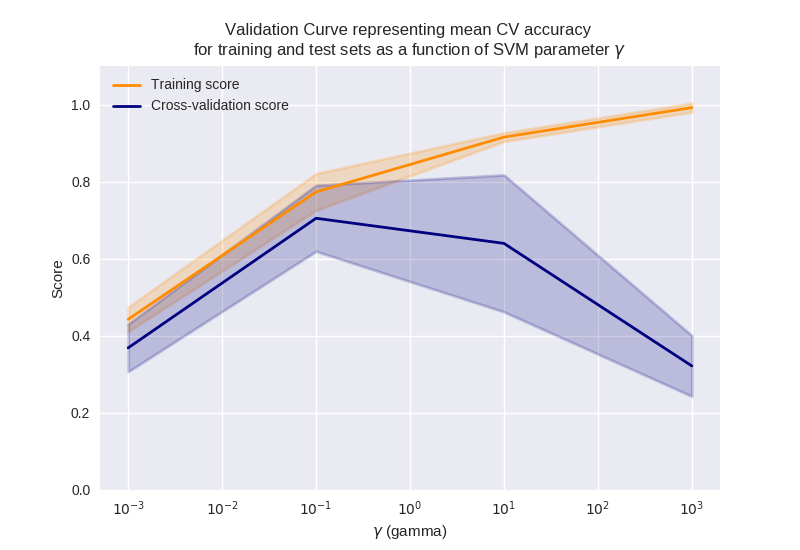

In [9]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve representing mean CV accuracy \nfor training and test sets as a function of SVM parameter $\gamma$')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

